In [8]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
from scipy.optimize import curve_fit

In [99]:
adoption = pd.read_excel('/Users/haitonghuang/Downloads/adoptionseries2_with_noise.xlsx')

In [100]:
adoption

,t,N(t)
0,1,0.123
1,2,0.097
2,3,0.171
3,4,0.145
4,5,0.238
5,6,0.214
6,7,0.333
7,8,0.314
8,9,0.466
9,10,0.455


In [101]:
A = []
A.append(0)
for i in range(1,len(adoption)):
    S = A[-1] + adoption['N(t)'][i-1]
    A.append(S)

A = [round(num,3) for num in A]

adoption = pd.concat([adoption,pd.DataFrame(A).rename({0:'A'},axis = 1)],axis =1)
adoption

,t,N(t),A
0,1,0.123,0.000
1,2,0.097,0.123
2,3,0.171,0.220
3,4,0.145,0.391
4,5,0.238,0.536
5,6,0.214,0.774
6,7,0.333,0.988
7,8,0.314,1.321
8,9,0.466,1.635
9,10,0.455,2.101


In [102]:
adoption['A2'] = round(np.power(adoption['A'],2),3)

In [103]:
adoption = adoption.rename({'N(t)':'Nt'},axis = 1)

In [104]:
adoption

,t,Nt,A,A2
0,1,0.123,0.000,0.000
1,2,0.097,0.123,0.015
2,3,0.171,0.220,0.048
3,4,0.145,0.391,0.153
4,5,0.238,0.536,0.287
5,6,0.214,0.774,0.599
6,7,0.333,0.988,0.976
7,8,0.314,1.321,1.745
8,9,0.466,1.635,2.673
9,10,0.455,2.101,4.414


In [105]:
model = smf.ols(formula = 'Nt ~ A + A2', data = adoption).fit()

In [106]:
coefs = model.params

In [107]:
a = round(coefs['Intercept'],3)
b = round(coefs['A'],3)
c = round(coefs['A2'],3)

In [108]:
[a,b,c]

[0.096, 0.211, -0.006]

In [109]:
def get_p(a,b,c):
    p = (np.sqrt(np.power(b,2) - 4 * a * c) - b ) / 2
    return p

In [110]:
def get_q(a,b,c):
    q = (np.sqrt(np.power(b,2) - 4 * a * c) + b) / 2
    return q 

In [111]:
def get_M(q,c):
    M = -q / c
    return M

In [112]:
p = get_p(a,b,c)
q = get_q(a,b,c)
m = get_M(q,c)

In [113]:
pd.DataFrame([p,q,m],index = ['p','q','m'],columns = ['value']).round(3)

,value
p,0.003
q,0.214
m,35.616


In [114]:
print(f"p when M is not fixed = {p:.4f}\nq when M is not fixed = {q:.4f}")

p when M is not fixed = 0.0027
q when M is not fixed = 0.2137


In [115]:
T = 30

#  A(t), N(t), and R(t)
A = [0]
N = [m * p]
R = [m]

for t in range(1, T+1):
    A_t = N[t-1] + A[t-1]
    R_t = m - A_t
    F_t = p + q * A_t / m
    N_t = F_t * R_t
    A.append(A_t)
    N.append(N_t)
    R.append(R_t - N_t)

t = [i for i in range(0,31)]

result = pd.DataFrame([t,N,A,R]).T.rename({0:'t',1:'Nt',2:'At',3:'Rt'},axis = 1).round(3)
result['At2'] = np.power(result['At'],2)
result

,t,Nt,At,Rt,At2
0,0.0,0.096,0.000,35.616,0.000000
1,1.0,0.116,0.096,35.404,0.009216
2,2.0,0.141,0.212,35.263,0.044944
3,3.0,0.170,0.353,35.094,0.124609
4,4.0,0.205,0.522,34.889,0.272484
5,5.0,0.246,0.727,34.643,0.528529
6,6.0,0.296,0.973,34.347,0.946729
7,7.0,0.354,1.269,33.993,1.610361
8,8.0,0.423,1.623,33.570,2.634129
9,9.0,0.503,2.046,33.068,4.186116


### Prediction of period 30: N(30) = 0.896

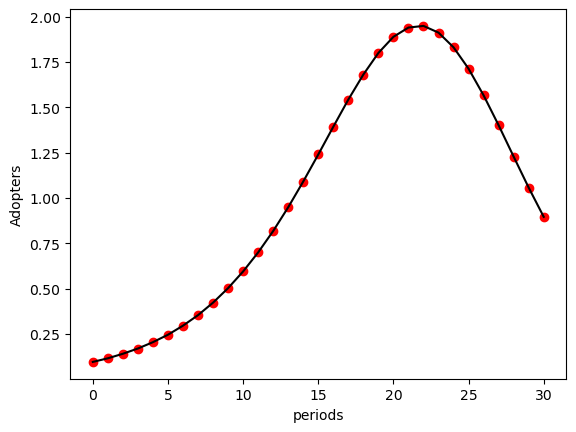

In [79]:
fig,ax = plt.subplots()

ax.scatter(result['t'], result['Nt'], color = 'red')
ax.plot(result['t'], result['Nt'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Adopters')
plt.show()

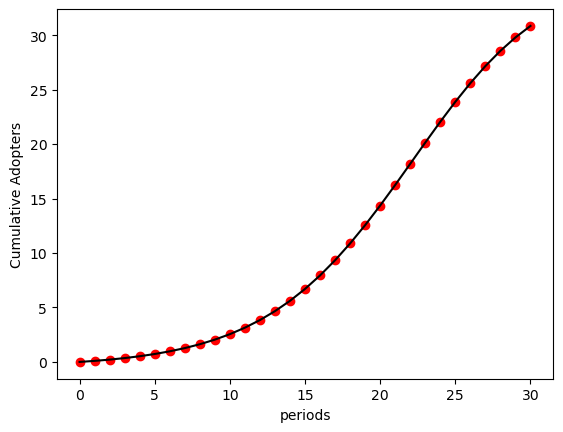

In [80]:
fig,ax = plt.subplots()

ax.scatter(result['t'], result['At'], color = 'red')
ax.plot(result['t'], result['At'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Cumulative Adopters')
plt.show()

## Trying Nonlinear Least Squares approach 

In [85]:
def nt(a,p,q):
    m = 100
    
    return (m * p + (q - p) * a['A'] - (q/m) * a['A2'])

In [226]:

p0 = [0.02,0.05]

x_data = adoption[['A','A2']]
y_data = adoption['Nt'].values
# Fit the model to the data
popt, pcov = curve_fit(nt, x_data, y_data,p0=p0)
popt

array([0.00106072, 0.19368439])

In [229]:
p2 = round(popt[0],5)
q2 = round(popt[1],5)

In [237]:
pd.DataFrame([p2,q2], index = ['p','q'], columns = ['values'])

,values
p,0.00106
q,0.19368


In [89]:
T = 30

#  A(t), N(t), and R(t)
m2 = 100
A2 = [0]
N2 = [m2 * p2]
R2 = [m2]

for t in range(1, T+1):
    A_t2 = N2[t-1] + A2[t-1]
    R_t2 = m2 - A_t2
    F_t2 = p2 + q2 * (A_t2 / m2)
    N_t2 = F_t2 * R_t2
    A2.append(A_t2)
    N2.append(N_t2)
    R2.append(R_t2 - N_t2)

t2 = [i for i in range(0,31)]

result2 = pd.DataFrame([t2,N2,A2,R2]).T.rename({0:'t',1:'Nt',2:'At',3:'Rt'},axis = 1).round(3)
result2

,t,Nt,At,Rt
0,0.0,0.110,0.000,100.000
1,1.0,0.131,0.110,99.759
2,2.0,0.156,0.241,99.603
3,3.0,0.186,0.397,99.416
4,4.0,0.222,0.584,99.194
5,5.0,0.264,0.806,98.931
6,6.0,0.314,1.069,98.617
7,7.0,0.373,1.383,98.244
8,8.0,0.442,1.756,97.802
9,9.0,0.524,2.198,97.278


### The prediction of Non-Linear approach at period 30: N(30) = 4.781

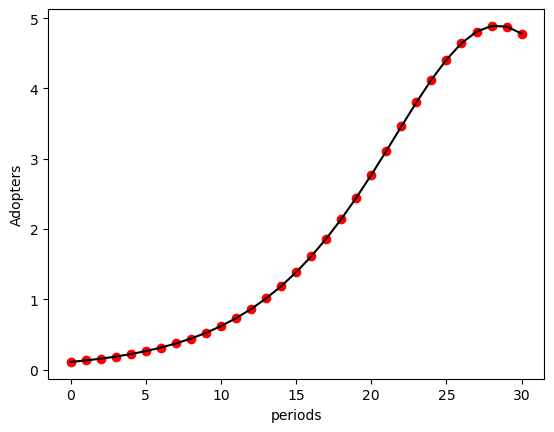

In [90]:
fig,ax = plt.subplots()

ax.scatter(result2['t'], result2['Nt'], color = 'red')
ax.plot(result2['t'], result2['Nt'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Adopters')
plt.show()

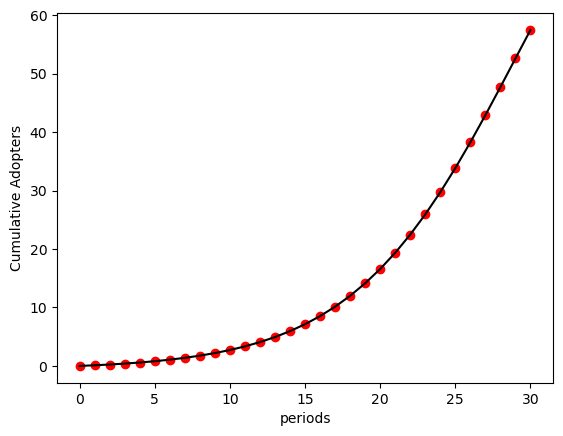

In [91]:
fig,ax = plt.subplots()

ax.scatter(result2['t'], result2['At'], color = 'red')
ax.plot(result2['t'], result2['At'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Cumulative Adopters')
plt.show()

## Continuous Bass Model

In [92]:
def continuous_bass_model(a, p, q):
    m = 100
    At = m * ((1 - np.exp(-(p + q) * a)) / (1 + (q / p) * (np.exp(-(p + q) * a))))
    At_pre = m * ((1 - np.exp(-(p + q) * (a-1))) / (1 + (q / p) * (np.exp(-(p + q) * (a-1)))))
    Nt = At - At_pre
    return Nt


p0 = [0.02,0.5]

x_data = adoption['t'].values
y_data = adoption['Nt'].values

# Fit the model to the data
popt, pcov = curve_fit(continuous_bass_model, x_data, y_data, p0 = p0)
p3,q3 = popt
popt


array([0.00095545, 0.17857013])

In [93]:
round(p3,6)

0.000955

In [94]:
round(q3,6)

0.17857

In [95]:
m = 100

In [96]:
T3 = 30

#  A(t), N(t), and R(t)
A3 = [0]
N3 = [m * p3]
R3 = [m]

for t in range(1, T3+1):
    A_t3 = m * ((1 - np.exp(-(p3 + q3) * t)) / (1 + (q3 / p3) * (np.exp(-(p3 + q3) * t))))
    R_t3 = m - A_t3
    A_t_pre = m * ((1 - np.exp(-(p3 + q3) * (t-1))) / (1 + (q3 / p3) * (np.exp(-(p3 + q3) * (t-1)))))
    N_t3 = A_t3 - A_t_pre
    A3.append(A_t3)
    N3.append(N_t3)
    R3.append(R_t3 - N_t3)

t = [i for i in range(0,31)]

result3 = pd.DataFrame([t,N3,A3,R3]).T.rename({0:'t',1:'Nt',2:'At',3:'Rt'},axis = 1).round(3)
result3

,t,Nt,At,Rt
0,0.0,0.096,0.000,100.000
1,1.0,0.105,0.105,99.791
2,2.0,0.125,0.229,99.646
3,3.0,0.149,0.378,99.473
4,4.0,0.178,0.556,99.266
5,5.0,0.212,0.768,99.020
6,6.0,0.252,1.020,98.728
7,7.0,0.300,1.320,98.380
8,8.0,0.357,1.677,97.966
9,9.0,0.424,2.101,97.476


In [235]:
pd.DataFrame([p3,q3,4.504], index = ['p','q','N(30)'], columns = ['values'])

,values
p,0.000955
q,0.178570
N(30),4.504000


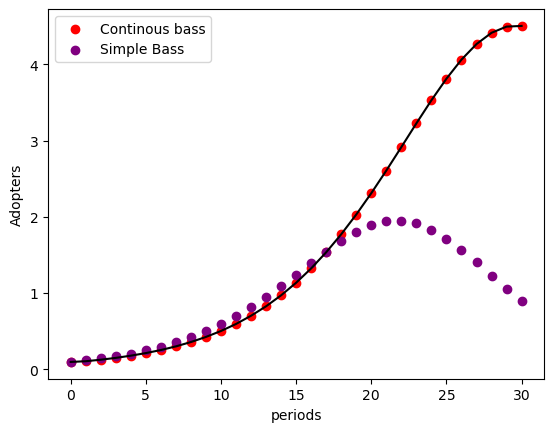

In [116]:
fig,ax = plt.subplots()

ax.scatter(result3['t'], result3['Nt'], color = 'red')
ax.scatter(result['t'], result['Nt'], color = 'purple')
ax.plot(result3['t'], result3['Nt'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Adopters')
plt.legend(['Continous bass','Simple Bass'])
plt.show()

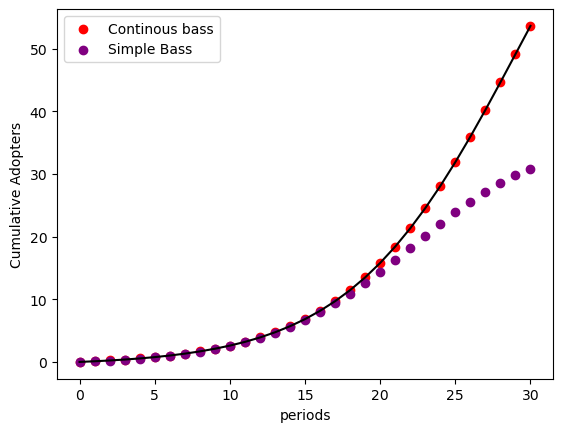

In [117]:
fig,ax = plt.subplots()

ax.scatter(result3['t'], result3['At'], color = 'red')
ax.scatter(result['t'], result['At'], color = 'purple')
ax.plot(result3['t'], result3['At'],color = 'black')
ax.set_xlabel('periods')
ax.set_ylabel('Cumulative Adopters')
plt.legend(['Continous bass','Simple Bass'])
plt.show()

## Study the effects of p and q

In [174]:
start = 0.005
end = 0.8
step = 0.2
value_p = []

for i in range(int((end - start) / step) + 1):
    value_p.append(start + i * step)



In [175]:
start = 0.1
end = 0.8
step = 0.2
value_q = []

for i in range(int((end - start) / step) + 1):
    value_q.append(start + i * step)


In [176]:
value_p = [round(i,3) for i in value_p]
value_p

[0.005, 0.205, 0.405, 0.605]

In [173]:
value_q = [round(i,3) for i in value_q]
value_q

[0.1, 0.3, 0.5, 0.7]

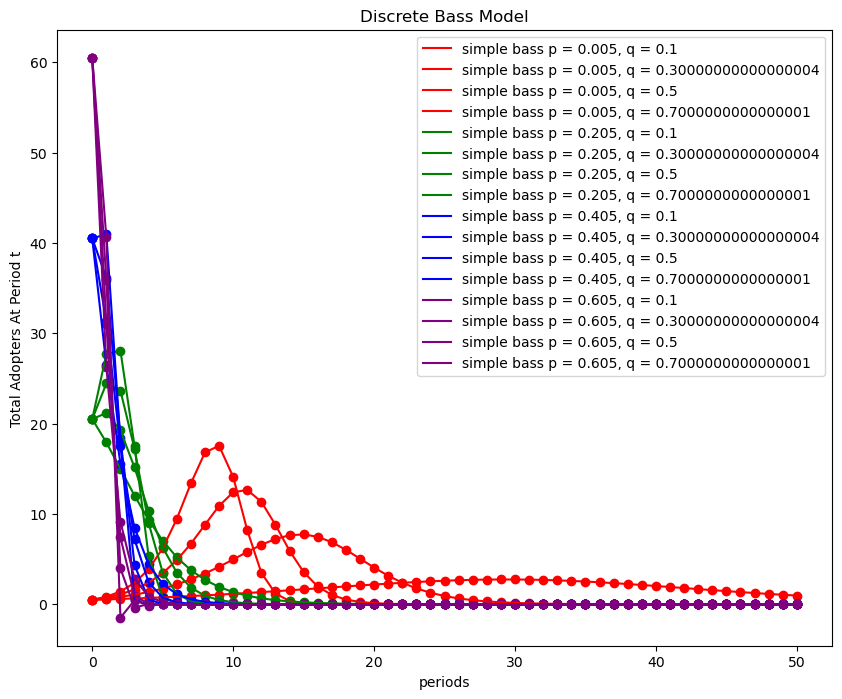

In [225]:
T = 50
M = 100
results = []

for p_idx, p in enumerate(value_p):
    for q_idx, q in enumerate(value_q):
        A = [0]
        N = [M * p]
        R = [M]

        for t in range(1, T + 1):
            A_t = N[t - 1] + A[t - 1]
            R_t = M - A_t
            F_t = p + q * (A_t / M)
            N_t = F_t * R_t
            A.append(A_t)
            N.append(N_t)
            R.append(R_t - N_t)

        t_values = [i for i in range(0, T + 1)]
        result = pd.DataFrame([t_values, N, A, R]).T.rename({0: 't', 1: 'Nt', 2: 'At', 3: 'Rt'}, axis=1).round(3)
        results.append((p_idx, q_idx, result))

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple']

for p_idx, q_idx, result in results:
    color = colors[p_idx % len(colors)]
    label = f'simple bass p = {value_p[p_idx]}, q = {value_q[q_idx]}'
    ax.scatter(result['t'], result['Nt'], color=color)
    ax.plot(result['t'], result['Nt'], color=color, label=label)

ax.set_xlabel('periods')
ax.set_ylabel('Total Adopters At Period t')
ax.set_title('Discrete Bass Model')
plt.legend()
plt.show()


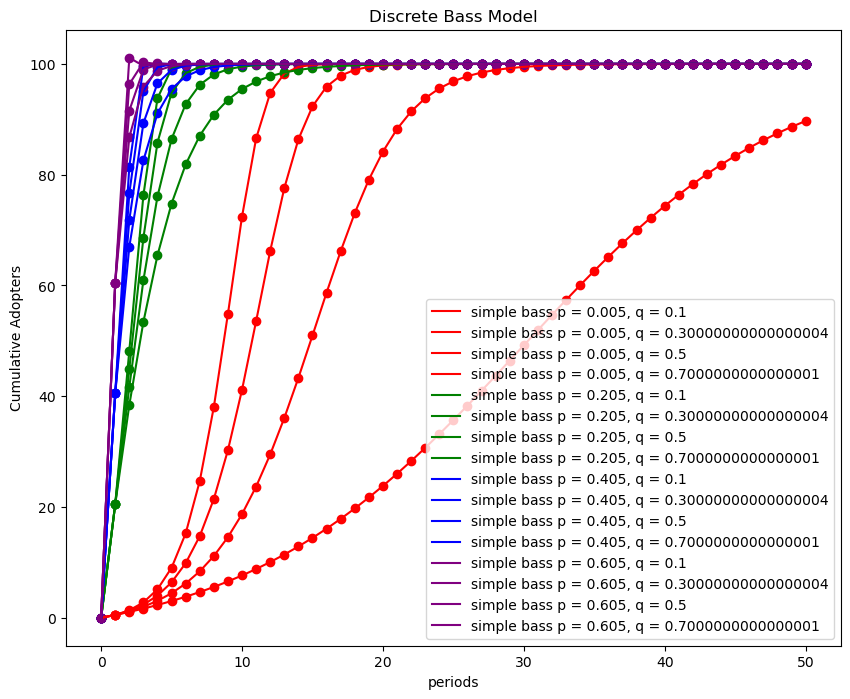

In [224]:
T = 50
M = 100
results = []

for p_idx, p in enumerate(value_p):
    for q_idx, q in enumerate(value_q):
        A = [0]
        N = [M * p]
        R = [M]

        for t in range(1, T + 1):
            A_t = N[t - 1] + A[t - 1]
            R_t = M - A_t
            F_t = p + q * (A_t / M)
            N_t = F_t * R_t
            A.append(A_t)
            N.append(N_t)
            R.append(R_t - N_t)

        t_values = [i for i in range(0, T + 1)]
        result = pd.DataFrame([t_values, N, A, R]).T.rename({0: 't', 1: 'Nt', 2: 'At', 3: 'Rt'}, axis=1).round(3)
        results.append((p_idx, q_idx, result))

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple']

for p_idx, q_idx, result in results:
    color = colors[p_idx % len(colors)]
    label = f'simple bass p = {value_p[p_idx]}, q = {value_q[q_idx]}'
    ax.scatter(result['t'], result['At'], color=color)
    ax.plot(result['t'], result['At'], color=color, label=label)

ax.set_xlabel('periods')
ax.set_ylabel('Cumulative Adopters')
ax.set_title('Discrete Bass Model')
plt.legend()
plt.show()


### In the Bass model, 'p' represents the coefficient of innovation. Increasing 'p' will lead to a higher initial adoption rate. The curve will start steeper because more people will adopt the product at the beginning, even without any external influence from imitators, and indicating faster adoption in the early stages.The peak of the adoption rate curve will shift to the left, meaning that the maximum adoption rate is reached earlier in time.

### In the Bass model, 'q' represents the coefficient of imitation. Increasing 'q' will lead to a higher adoption rate due to social influence or word-of-mouth. As more people adopt the product, the influence of imitators becomes stronger, leading to faster adoption by others. With a higher 'q' value, the cumulative adoption curve will become more S-shaped, reflecting a more significant impact of social influence on the overall adoption process. If the 'q' value is increased significantly while keeping the 'p' value constant, the peak of the adoption rate curve will become more pronounced, and it may shift to the right. This means that the maximum adoption rate is reached later in time, with a steeper increase before the peak and a steeper decrease after the peak.

## Compare with Continuous Bass Model

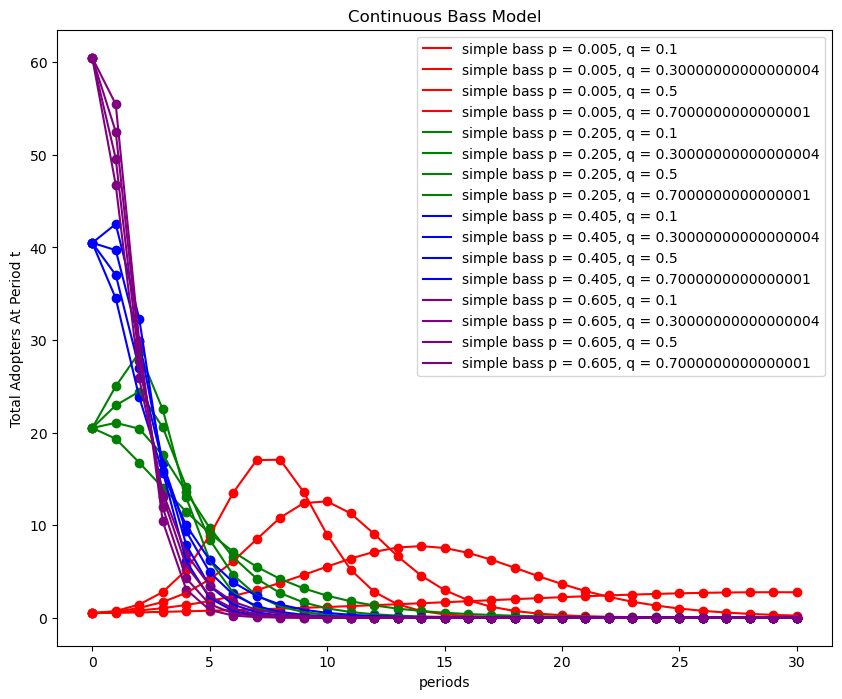

In [223]:
T = 50
M = 100
results = []

for p_idx, p in enumerate(value_p):
    for q_idx, q in enumerate(value_q):
        A = [0]
        N = [M * p]
        R = [M]
        
        for t in range(1, T3+1):
            A_t3 = M * ((1 - np.exp(-(p + q) * t)) / (1 + (q / p) * (np.exp(-(p + q) * t))))
            R_t3 = M - A_t3
            A_t_pre = M * ((1 - np.exp(-(p + q) * (t-1))) / (1 + (q / p) * (np.exp(-(p + q) * (t-1)))))
            N_t3 = A_t3 - A_t_pre
            A.append(A_t3)
            N.append(N_t3)
            R.append(R_t3 - N_t3)

        t_values = [i for i in range(0, T + 1)]
        result = pd.DataFrame([t_values, N, A, R]).T.rename({0: 't', 1: 'Nt', 2: 'At', 3: 'Rt'}, axis=1).round(3)
        results.append((p_idx, q_idx, result))

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple']

for p_idx, q_idx, result in results:
    color = colors[p_idx % len(colors)]
    label = f'simple bass p = {value_p[p_idx]}, q = {value_q[q_idx]}'
    ax.scatter(result['t'], result['Nt'], color=color)
    ax.plot(result['t'], result['Nt'], color=color, label=label)

ax.set_xlabel('periods')
ax.set_ylabel('Total Adopters At Period t')
ax.set_title('Continuous Bass Model')
plt.legend()
plt.show()


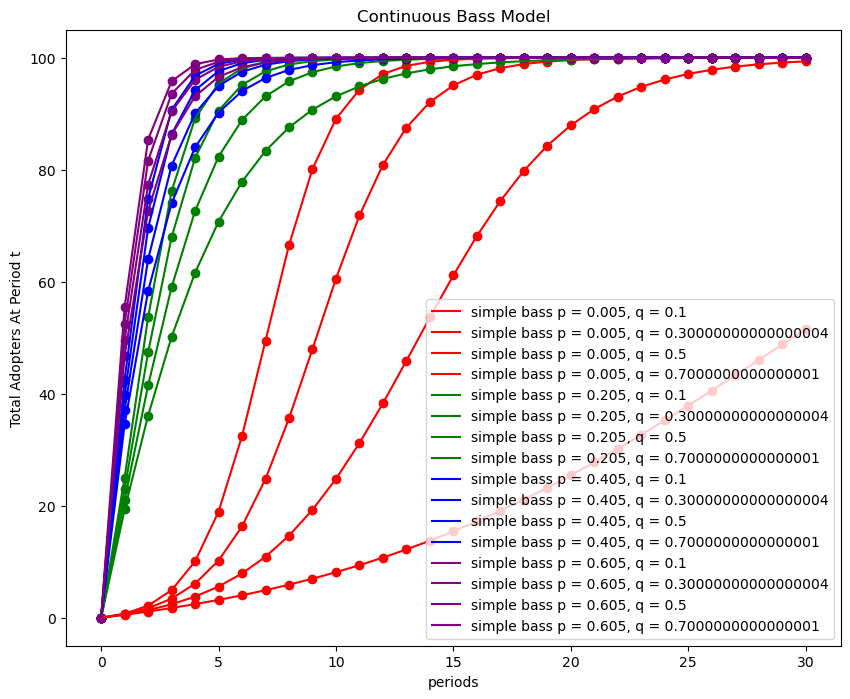

In [222]:
T = 50
M = 100
results = []

for p_idx, p in enumerate(value_p):
    for q_idx, q in enumerate(value_q):
        A = [0]
        N = [M * p]
        R = [M]
        
        for t in range(1, T3+1):
            A_t3 = M * ((1 - np.exp(-(p + q) * t)) / (1 + (q / p) * (np.exp(-(p + q) * t))))
            R_t3 = M - A_t3
            A_t_pre = M * ((1 - np.exp(-(p + q) * (t-1))) / (1 + (q / p) * (np.exp(-(p + q) * (t-1)))))
            N_t3 = A_t3 - A_t_pre
            A.append(A_t3)
            N.append(N_t3)
            R.append(R_t3 - N_t3)

        t_values = [i for i in range(0, T + 1)]
        result = pd.DataFrame([t_values, N, A, R]).T.rename({0: 't', 1: 'Nt', 2: 'At', 3: 'Rt'}, axis=1).round(3)
        results.append((p_idx, q_idx, result))

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple']

for p_idx, q_idx, result in results:
    color = colors[p_idx % len(colors)]
    label = f'simple bass p = {value_p[p_idx]}, q = {value_q[q_idx]}'
    ax.scatter(result['t'], result['At'], color=color)
    ax.plot(result['t'], result['At'], color=color, label=label)

ax.set_xlabel('periods')
ax.set_ylabel('Total Adopters At Period t')
ax.set_title('Continuous Bass Model')
plt.legend()
plt.show()
